## Youtube Vaccination Twitter Text Report
#### EMAT 22110 - Data in Emerging Media and Technology
#### Author: Kerri Donaldson
#### Created: 4/01/21
#### Last Updated: 4/04/21

For this report I want to, hopefully, show the different comments from Youtube about the COVID Vaccination.
I will find out who the comments came from to determine how many people have the same opinion about the vaccine. The question I want to answer is are there actually a lot of people who think the vaccine is pointless?

#### Load in the required packages for the report

In [76]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import warnings
import nltk
from nltk import tokenize as tk
from nltk import FreqDist
from nltk.corpus import stopwords
#import matplotlib
from matplotlib import pyplot as plt
import string
from collections import Counter
from datetime import datetime as dt
from scipy import stats
#import nltk
#nltk.download('vader_lexicon')
#nltk.download('punkt')

#### Load in the data

I decided to use the data from Youtube about the vaccine so that is what I loaded in below.

In [77]:
you = pd.read_csv(r'C:\Users\kdona\Desktop\School\DataInEMAT\YouTubeVaccination_Dec14-Dec26_2021_fixed.csv')
you.keys()

Index(['Date', 'Title', 'Url', 'Domain', 'Page Type', 'Language', 'Author',
       'Full Name', 'Full Text', 'Original Url', 'Thread Entry Type',
       'Page Type Name', 'Pub Type'],
      dtype='object')

In [78]:
warnings.filterwarnings('ignore')

In [79]:
you['Language'].head(20)

0     en
1     en
2     en
3     en
4     en
5     en
6     en
7     en
8     en
9     en
10    en
11    en
12    en
13    en
14    en
15    en
16    en
17    en
18    en
19    en
Name: Language, dtype: object

I made sure to only include the comments in English because it will be easier for me to understand since I only speak English fluently.

In [80]:
en_only = you.loc[you['Language'] == 'en']
en_only.head()

,Date,Title,Url,Domain,Page Type,Language,Author,Full Name,Full Text,Original Url,Thread Entry Type,Page Type Name,Pub Type
0,12/26/2020 23:56,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=sT80A5uPREolc=...,youtube.com,youtube,en,RJ MacReady,RJ MacReady,"I got the Moderna vaccine, hereâ€™s my list of...",https://www.youtube.com/watch?v=sT80A5uPREolc=...,reply,YouTube,VCOMMENT
1,12/26/2020 23:36,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,youtube.com,youtube,en,dontaskme,dontaskme,@Charlotte Haggerty Do you really believe ever...,https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,reply,YouTube,VCOMMENT
2,12/26/2020 23:34,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=2Wz7KvLFgYQlc=...,youtube.com,youtube,en,Salavin,Salavin,"I hate it when they say ""You don't want a covi...",https://www.youtube.com/watch?v=2Wz7KvLFgYQlc=...,reply,YouTube,VCOMMENT
3,12/26/2020 23:30,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,youtube.com,youtube,en,dontaskme,dontaskme,"@Sweet Heart Well, Quantas, an Australian airl...",https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,reply,YouTube,VCOMMENT
4,12/26/2020 23:27,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=7VG_s2PCH_clc=...,youtube.com,youtube,en,Kristi Allman,Kristi Allman,@AngryAngy Here they recommend a flu shot duri...,https://www.youtube.com/watch?v=7VG_s2PCH_clc=...,reply,YouTube,VCOMMENT


I created a preview of the comments and then decided to choose random numbers to see the full text of the comments that were made. Some were in favor of the vaccine and others were so angry that they felt cursing was appropriate.

In [81]:
en_only['Full Text'].head()

0    I got the Moderna vaccine, hereâ€™s my list of...
1    @Charlotte Haggerty Do you really believe ever...
2    I hate it when they say "You don't want a covi...
3    @Sweet Heart Well, Quantas, an Australian airl...
4    @AngryAngy Here they recommend a flu shot duri...
Name: Full Text, dtype: object

In [82]:
en_only['Full Text'][159]

'i can swear that Covid has spread through kids in majority , they are the ones not wearing masks in majority too. they should have used masks like a vaccine like the example of having to use it to be in schools and meetups etc everywhere.'

I wanted to make all the text lowercase to make it easier to look at.

In [83]:
en_only['text_lower'] = [x.lower() for x in en_only['Full Text']]
en_only['text_lower'].head(10)

0    i got the moderna vaccine, hereâ€™s my list of...
1    @charlotte haggerty do you really believe ever...
2    i hate it when they say "you don't want a covi...
3    @sweet heart well, quantas, an australian airl...
4    @angryangy here they recommend a flu shot duri...
5    we don't need a corona vaccine, we need a come...
6    i had no idea of who this guy was prior to thi...
7    @angryangy zero medical test is done before se...
8    @justin kirschenman i don't know about your lo...
9    remember when the french scientist said test a...
Name: text_lower, dtype: object

In [84]:
en_only['Full Text'][1]

'@Charlotte Haggerty Do you really believe everything your told? No, the vaccines will not end the pandemic. Herd immunization is what will do it. However, they will claim that it is the vaccine that did it. The virus will be gone by August, btw.'

I used tokenize to separate the words. I also had to make sure that when the words are separated that there are no punctuation attatched.

In [85]:
en_only['tokens'] = [tk.word_tokenize(x) for x in en_only['text_lower']]
en_only['tokens'].head(5)

0    [i, got, the, moderna, vaccine, ,, hereâ€™s, m...
1    [@, charlotte, haggerty, do, you, really, beli...
2    [i, hate, it, when, they, say, ``, you, do, n'...
3    [@, sweet, heart, well, ,, quantas, ,, an, aus...
4    [@, angryangy, here, they, recommend, a, flu, ...
Name: tokens, dtype: object

In [86]:
en_only['tokens'][2]

['i',
 'hate',
 'it',
 'when',
 'they',
 'say',
 '``',
 'you',
 'do',
 "n't",
 'want',
 'a',
 'covid',
 'vaccine',
 '?',
 'well',
 ',',
 'it',
 'worked',
 'for',
 'smallpox',
 'and',
 'polio',
 '!',
 '!',
 '!',
 "''",
 '.',
 'yeah',
 'but',
 'here',
 "'s",
 'the',
 'difference',
 ':',
 'covid',
 'is',
 "n't",
 'even',
 '0.1',
 '%',
 'as',
 'deadly',
 'as',
 'smallpox',
 'for',
 'example',
 '.',
 'that',
 "'s",
 'my',
 'issue',
 'with',
 'it',
 '.',
 'i',
 "'m",
 'definitely',
 'not',
 'against',
 'vaccines',
 ',',
 'it',
 'would',
 'be',
 'stupid',
 'to',
 'be',
 'against',
 'such',
 'a',
 'great',
 'advancement',
 'of',
 'mankind',
 '.',
 'but',
 'should',
 'we',
 'vaccinate',
 'ourselves',
 'against',
 'everything',
 '?',
 'i',
 'mean',
 'cmon',
 '...',
 'i',
 'support',
 'covid',
 'vaccinations',
 'for',
 'people',
 'older',
 'than',
 '65',
 'etc',
 'but',
 'definitely',
 'not',
 'for',
 'people',
 'between',
 'the',
 'ages',
 'of',
 '0-35',
 '...']

I used len to find out how many stop words there are so that I could either append or get rid of them.

In [87]:
len(stopwords.words('english'))

179

In [88]:
mystopwords = stopwords.words('english')
mystopwords.append("n't")
mystopwords.append("'s")
len(mystopwords)

181

I created a loop to filter the word into tokens if it is not in mystopwords.

In [89]:
filtered = []
for i in en_only['tokens']:
    filtered.append([word for word in i if word not in mystopwords])
    
en_only['filtered'] = filtered

In [90]:
en_only['filtered'][2]

['hate',
 'say',
 '``',
 'want',
 'covid',
 'vaccine',
 '?',
 'well',
 ',',
 'worked',
 'smallpox',
 'polio',
 '!',
 '!',
 '!',
 "''",
 '.',
 'yeah',
 'difference',
 ':',
 'covid',
 'even',
 '0.1',
 '%',
 'deadly',
 'smallpox',
 'example',
 '.',
 'issue',
 '.',
 "'m",
 'definitely',
 'vaccines',
 ',',
 'would',
 'stupid',
 'great',
 'advancement',
 'mankind',
 '.',
 'vaccinate',
 'everything',
 '?',
 'mean',
 'cmon',
 '...',
 'support',
 'covid',
 'vaccinations',
 'people',
 'older',
 '65',
 'etc',
 'definitely',
 'people',
 'ages',
 '0-35',
 '...']

In [91]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

I noticed the punctuation was not filtered out so I created an array to filter only words with no punctuation.

In [92]:
no_punct = []
for i in en_only['filtered']:
    no_punct.append([word for word in i if word not in string.punctuation])
    
en_only['no_punct'] = no_punct
en_only['no_punct'][2]

['hate',
 'say',
 '``',
 'want',
 'covid',
 'vaccine',
 'well',
 'worked',
 'smallpox',
 'polio',
 "''",
 'yeah',
 'difference',
 'covid',
 'even',
 '0.1',
 'deadly',
 'smallpox',
 'example',
 'issue',
 "'m",
 'definitely',
 'vaccines',
 'would',
 'stupid',
 'great',
 'advancement',
 'mankind',
 'vaccinate',
 'everything',
 'mean',
 'cmon',
 '...',
 'support',
 'covid',
 'vaccinations',
 'people',
 'older',
 '65',
 'etc',
 'definitely',
 'people',
 'ages',
 '0-35',
 '...']

I wanted to see how many times different words were used so I used FreqDist find out.

In [93]:
freq = [FreqDist(x) for x in en_only['no_punct']]
en_only['freqs'] = freq
en_only['freqs']

0        {'got': 1, 'moderna': 1, 'vaccine': 1, 'hereâ€...
1        {'charlotte': 1, 'haggerty': 1, 'really': 1, '...
2        {'hate': 1, 'say': 1, '``': 1, 'want': 1, 'cov...
3        {'sweet': 1, 'heart': 1, 'well': 1, 'quantas':...
4        {'angryangy': 1, 'recommend': 1, 'flu': 5, 'sh...
                               ...                        
12486    {'pfizer': 1, 'fined': 1, 'corporation': 1, 'u...
12487    {'women': 1, 'first': 3, 'person': 2, 'get': 1...
12488    {'breast': 1, 'cancer': 1, 'survivor': 1, 'goo...
12489    {'panel': 1, 'members': 1, 'first': 1, 'get': ...
12490    {'tom': 1, 'r': 1, 'wo': 1, 'return': 1, 'easi...
Name: freqs, Length: 12491, dtype: object

#### Fix data layout

I did not like the way the data printed so I used a counter to add them together and they would print only once in each row.

In [94]:
A = Counter(en_only['freqs'][0])
B = Counter(en_only['freqs'][1])
A + B

Counter({'got': 1,
         'moderna': 1,
         'vaccine': 2,
         'hereâ€™s': 1,
         'list': 1,
         'side': 1,
         'effects': 1,
         'https': 1,
         '//youtu.be/9swygynujao': 1,
         'charlotte': 1,
         'haggerty': 1,
         'really': 1,
         'believe': 1,
         'everything': 1,
         'told': 1,
         'vaccines': 1,
         'end': 1,
         'pandemic': 1,
         'herd': 1,
         'immunization': 1,
         'however': 1,
         'claim': 1,
         'virus': 1,
         'gone': 1,
         'august': 1,
         'btw': 1})

In [95]:
en_only['f1_counts'] = [Counter(x) for x in en_only['freqs']]
en_only['f1_counts'][0]

Counter({'got': 1,
         'moderna': 1,
         'vaccine': 1,
         'hereâ€™s': 1,
         'list': 1,
         'side': 1,
         'effects': 1,
         'https': 1,
         '//youtu.be/9swygynujao': 1})

I found out how many words there are by making a for loop and adding up the words. I then printed how many words there were.

In [96]:
wordcounts = Counter()
for i in en_only['f1_counts']:
    wordcounts += i

In [97]:
len(wordcounts)

31928

In [98]:
type(wordcounts)

collections.Counter

In [99]:
dict(wordcounts)

{'got': 703,
 'moderna': 297,
 'vaccine': 17148,
 'hereâ€™s': 17,
 'list': 96,
 'side': 810,
 'effects': 889,
 'https': 4469,
 '//youtu.be/9swygynujao': 2,
 'charlotte': 13,
 'haggerty': 3,
 'really': 613,
 'believe': 754,
 'everything': 407,
 'told': 328,
 'vaccines': 2007,
 'end': 465,
 'pandemic': 868,
 'herd': 126,
 'immunization': 33,
 'however': 191,
 'claim': 118,
 'virus': 2699,
 'gone': 131,
 'august': 23,
 'btw': 48,
 'hate': 113,
 'say': 946,
 '``': 2989,
 'want': 1192,
 'covid': 2772,
 'well': 606,
 'worked': 83,
 'smallpox': 53,
 'polio': 150,
 "''": 2969,
 'yeah': 200,
 'difference': 88,
 'even': 1449,
 '0.1': 12,
 'deadly': 219,
 'example': 115,
 'issue': 137,
 "'m": 729,
 'definitely': 104,
 'would': 1867,
 'stupid': 207,
 'great': 380,
 'advancement': 3,
 'mankind': 17,
 'vaccinate': 137,
 'mean': 311,
 'cmon': 6,
 '...': 2515,
 'support': 118,
 'vaccinations': 167,
 'people': 4894,
 'older': 118,
 '65': 21,
 'etc': 321,
 'ages': 33,
 '0-35': 1,
 'sweet': 10,
 'heart':

### Create index

I created a better way to see the amount of times words were said. I then renamed the column to have it make more sense.

In [100]:
counts = pd.DataFrame.from_dict(dict(wordcounts), orient='index')
counts

,0
got,703
moderna,297
vaccine,17148
hereâ€™s,17
list,96
...,...
//www.mdpi.com/1660-4601/17/22/8674,1
adventure,1
hindi,1
urdu,1


In [101]:
counts = counts.rename(columns = {0: 'counts'})
counts

,counts
got,703
moderna,297
vaccine,17148
hereâ€™s,17
list,96
...,...
//www.mdpi.com/1660-4601/17/22/8674,1
adventure,1
hindi,1
urdu,1


In [102]:
count_sort = counts.sort_values('counts', ascending = False)[:40]
count_sort

,counts
vaccine,17148
people,4894
https,4469
get,3195
``,2989
'',2969
take,2805
covid,2772
virus,2699
...,2515


### Create different plots

I created a bar graph to show how many times each word has been used. The word vaccine has been used over 17,000 times. This makes sense because the data I used was about the vaccine.

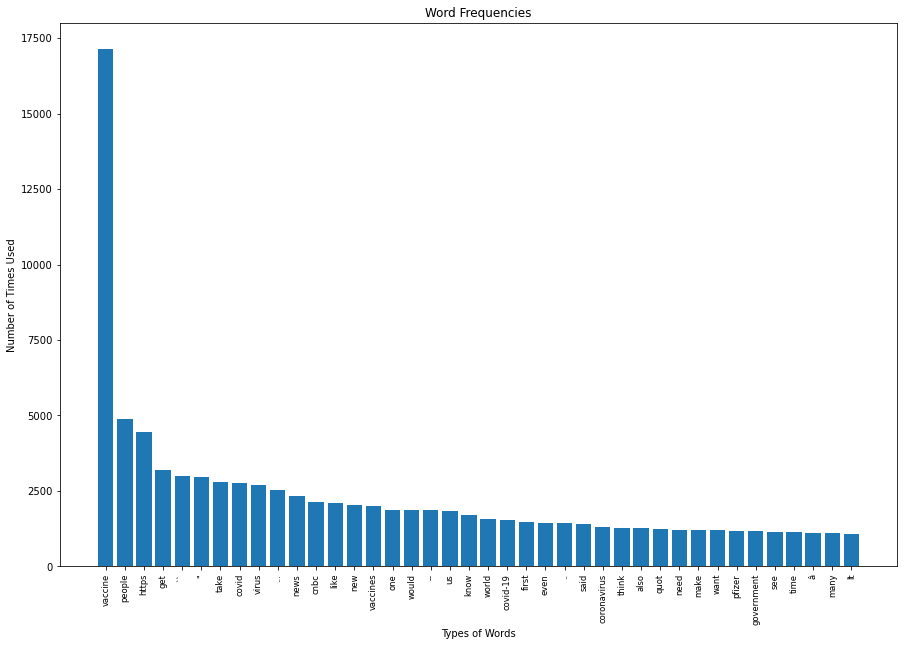

In [103]:
fig, ax0 = plt.subplots(figsize=(15,10))
ax0.bar(count_sort.index, count_sort['counts'])
plt.xticks(rotation=90, fontsize = 'small')
plt.xlabel('Types of Words')
plt.ylabel('Number of Times Used')
plt.title('Word Frequencies')
plt.show()

### Word positivity

Sometimes it is very helpful to see the polarity/ positivity scores for the word being used.

In [104]:
analyser = SentimentIntensityAnalyzer()

In [105]:
print(en_only['Full Text'][3])
print(analyser.polarity_scores(en_only['Full Text'][3]))

@Sweet Heart Well, Quantas, an Australian airline, has already made it that no one can fly with them unless they have a stamp on their passport showing that they got the vaccine. What will be next? Maybe a tattoo on your hand. Look, China is already doing this with their citizens, controlling all their moves. You do something wrong, you get a strike, meaning that you won't be allowed in a supermarket, or public places, or in an airport. The vaccine is just one step to get there where they (the U.N. and their 2030 agenda....look it up) want you.
{'neg': 0.066, 'neu': 0.87, 'pos': 0.064, 'compound': -0.0516}


In [106]:
en_only['vader_scores'] = [analyser.polarity_scores(x) for x in en_only['Full Text']]
en_only['vader_scores'].head(20)

0     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1     {'neg': 0.049, 'neu': 0.951, 'pos': 0.0, 'comp...
2     {'neg': 0.079, 'neu': 0.717, 'pos': 0.203, 'co...
3     {'neg': 0.066, 'neu': 0.87, 'pos': 0.064, 'com...
4     {'neg': 0.111, 'neu': 0.78, 'pos': 0.109, 'com...
5     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6     {'neg': 0.106, 'neu': 0.894, 'pos': 0.0, 'comp...
7     {'neg': 0.0, 'neu': 0.835, 'pos': 0.165, 'comp...
8     {'neg': 0.037, 'neu': 0.808, 'pos': 0.155, 'co...
9     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
10    {'neg': 0.05, 'neu': 0.879, 'pos': 0.071, 'com...
11    {'neg': 0.262, 'neu': 0.7, 'pos': 0.037, 'comp...
12    {'neg': 0.067, 'neu': 0.879, 'pos': 0.054, 'co...
13    {'neg': 0.135, 'neu': 0.778, 'pos': 0.087, 'co...
14    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
15    {'neg': 0.164, 'neu': 0.836, 'pos': 0.0, 'comp...
16    {'neg': 0.093, 'neu': 0.829, 'pos': 0.078, 'co...
17    {'neg': 0.072, 'neu': 0.645, 'pos': 0.283,

In [107]:
en_only['vader_scores'][2]['pos']

0.203

In [108]:
en_only['pos'] = [x['pos'] for x in en_only['vader_scores']]
en_only['pos']

0        0.000
1        0.000
2        0.203
3        0.064
4        0.109
         ...  
12486    0.129
12487    0.142
12488    0.211
12489    0.000
12490    0.000
Name: pos, Length: 12491, dtype: float64

I created another plot to show the positivity for each word.

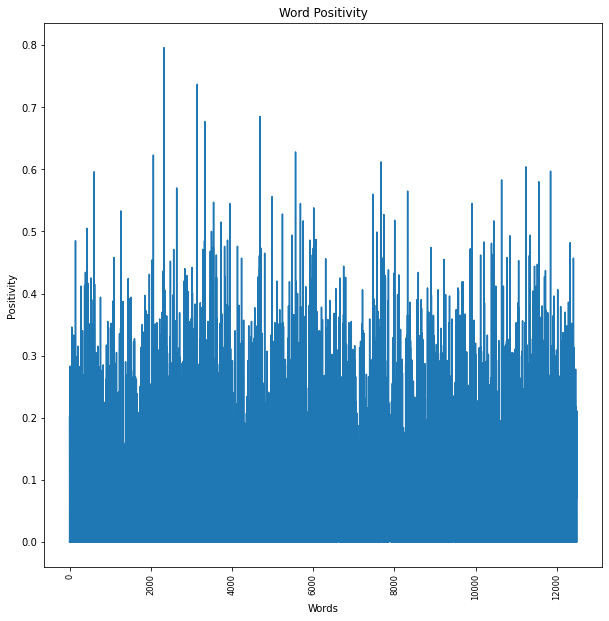

In [109]:
fig, ax0 = plt.subplots(figsize = (10,10))
ax0.plot(en_only['pos'])
plt.xticks(rotation=90, fontsize = 'small')
plt.xlabel('Words')
plt.ylabel('Positivity')
plt.title('Word Positivity')
plt.show()

In [110]:
type(en_only['Date'][0])

str

I had to make sure the dates were in the right format to create the next graph and for it to make sense.

In [111]:
en_only['Datetime'] = [dt.strptime(x, '%m/%d/%Y %H:%M') for x in en_only['Date']]
print(type(en_only['Datetime'][0]))
print(en_only['Datetime'][0])

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2020-12-26 23:56:00


This graph shows the positivity of words used per day. As you can see the scores change a lot.

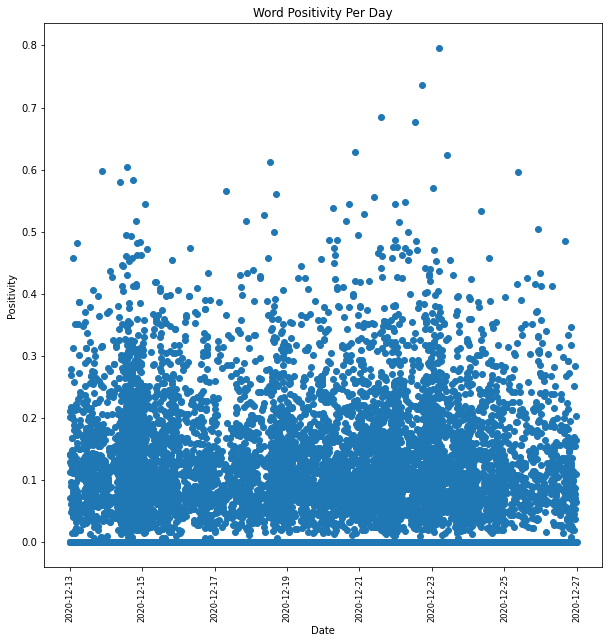

In [112]:
fig, ax1 = plt.subplots(figsize = (10,10))
ax1.scatter(en_only['Datetime'], en_only['pos'])
plt.xticks(rotation=90, fontsize = 'small')
plt.xlabel('Date')
plt.ylabel('Positivity')
plt.title('Word Positivity Per Day')
plt.show()

From all of the VADER Seiment Analyses I noticed that there are a lot of neutral words being used. There are also a couple words that have a higher positivity than others.

In [113]:
pre_announce = en_only.loc[en_only['Datetime'] < '2020-03-24 00:00:00.0'].reset_index()
pre_announce

,index,Date,Title,Url,Domain,Page Type,Language,Author,Full Name,Full Text,...,Pub Type,text_lower,tokens,filtered,no_punct,freqs,f1_counts,vader_scores,pos,Datetime


In [114]:
post_announce = en_only.loc[en_only['Datetime'] > '2020-03-24 00:00:00.0'].reset_index()
post_announce

,index,Date,Title,Url,Domain,Page Type,Language,Author,Full Name,Full Text,...,Pub Type,text_lower,tokens,filtered,no_punct,freqs,f1_counts,vader_scores,pos,Datetime
0,0,12/26/2020 23:56,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=sT80A5uPREolc=...,youtube.com,youtube,en,RJ MacReady,RJ MacReady,"I got the Moderna vaccine, hereâ€™s my list of...",...,VCOMMENT,"i got the moderna vaccine, hereâ€™s my list of...","[i, got, the, moderna, vaccine, ,, hereâ€™s, m...","[got, moderna, vaccine, ,, hereâ€™s, list, sid...","[got, moderna, vaccine, hereâ€™s, list, side, ...","{'got': 1, 'moderna': 1, 'vaccine': 1, 'hereâ€...","{'got': 1, 'moderna': 1, 'vaccine': 1, 'hereâ€...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,2020-12-26 23:56:00
1,1,12/26/2020 23:36,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,youtube.com,youtube,en,dontaskme,dontaskme,@Charlotte Haggerty Do you really believe ever...,...,VCOMMENT,@charlotte haggerty do you really believe ever...,"[@, charlotte, haggerty, do, you, really, beli...","[@, charlotte, haggerty, really, believe, ever...","[charlotte, haggerty, really, believe, everyth...","{'charlotte': 1, 'haggerty': 1, 'really': 1, '...","{'charlotte': 1, 'haggerty': 1, 'really': 1, '...","{'neg': 0.049, 'neu': 0.951, 'pos': 0.0, 'comp...",0.000,2020-12-26 23:36:00
2,2,12/26/2020 23:34,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=2Wz7KvLFgYQlc=...,youtube.com,youtube,en,Salavin,Salavin,"I hate it when they say ""You don't want a covi...",...,VCOMMENT,"i hate it when they say ""you don't want a covi...","[i, hate, it, when, they, say, ``, you, do, n'...","[hate, say, ``, want, covid, vaccine, ?, well,...","[hate, say, ``, want, covid, vaccine, well, wo...","{'hate': 1, 'say': 1, '``': 1, 'want': 1, 'cov...","{'hate': 1, 'say': 1, '``': 1, 'want': 1, 'cov...","{'neg': 0.079, 'neu': 0.717, 'pos': 0.203, 'co...",0.203,2020-12-26 23:34:00
3,3,12/26/2020 23:30,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,youtube.com,youtube,en,dontaskme,dontaskme,"@Sweet Heart Well, Quantas, an Australian airl...",...,VCOMMENT,"@sweet heart well, quantas, an australian airl...","[@, sweet, heart, well, ,, quantas, ,, an, aus...","[@, sweet, heart, well, ,, quantas, ,, austral...","[sweet, heart, well, quantas, australian, airl...","{'sweet': 1, 'heart': 1, 'well': 1, 'quantas':...","{'sweet': 1, 'heart': 1, 'well': 1, 'quantas':...","{'neg': 0.066, 'neu': 0.87, 'pos': 0.064, 'com...",0.064,2020-12-26 23:30:00
4,4,12/26/2020 23:27,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=7VG_s2PCH_clc=...,youtube.com,youtube,en,Kristi Allman,Kristi Allman,@AngryAngy Here they recommend a flu shot duri...,...,VCOMMENT,@angryangy here they recommend a flu shot duri...,"[@, angryangy, here, they, recommend, a, flu, ...","[@, angryangy, recommend, flu, shot, pregnancy...","[angryangy, recommend, flu, shot, pregnancy, b...","{'angryangy': 1, 'recommend': 1, 'flu': 5, 'sh...","{'angryangy': 1, 'recommend': 1, 'flu': 5, 'sh...","{'neg': 0.111, 'neu': 0.78, 'pos': 0.109, 'com...",0.109,2020-12-26 23:27:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12486,12486,12/13/2020 0:12,Comment on video https://www.youtube.com/watch...,http://www.youtube.com/all_comments?v=JMEK0-zO...,youtube.com,youtube,en,Sarah Wales,NaN,Pfizer - The most fined Corporation in the US ...,...,VCOMMENT,pfizer - the most fined corporation in the us ...,"[pfizer, -, the, most, fined, corporation, in,...","[pfizer, -, fined, corporation, us, fraud, cri...","[pfizer, fined, corporation, us, fraud, crimin...","{'pfizer': 1, 'fined': 1, 'corporation': 1, 'u...","{'pfizer': 1, 'fined': 1, 'corporation': 1, 'u...","{'neg': 0.235, 'neu': 0.636, 'pos': 0.129, 'co...",0.129,2020-12-13 00:12:00
12487,12487,12/13/2020 0:11,Com

In [115]:
stats.describe(post_announce['pos']).mean

0.08975366263709869

In [116]:
stats.ttest_ind(pre_announce['pos'], post_announce['pos'])

Ttest_indResult(statistic=nan, pvalue=nan)

## Conclusion

This was a very fun report to do because of all the comments I was able to look at. I learned that there are many people not in favor of the vaccine which I think is crazy considering my cousin did research for her college course on the vaccine and there are no benefits to not taking the vaccine. Thee only thing a person gets from that is not getting a shot. People like jersey4life31 are not in favor of the vaccine. They get so angry over it that they feel cursing is neccesary. Now to my original question. It was "Are there actually a lot of people who think the vaccine is pointless?" From the comments I saw, there were a good amount of people who do not want the vaccine. I also saw that there are a lot of people who believe in it. So I would say that my question was answered and the answer is yes there are a lot more people than I thought that do not want the vaccine.

### Reflection

There were some limitations to doing this report but in the end I was able to learn what I wanted. The authors of the comments did not have their full names so that was not helpful but atleat I was able to see some names for the comments that were made. The next steps I would take are to dive more into what each person commented. I find it very interesting to see what other people are saying about the vaccine. 